In [48]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Fetch dataset, keep 'close' prices
hourly_prices = []
r = csv.DictReader(open('Gemini_BTCUSD_1h.csv'))
for x in r:
    price = float(x['Close'])
    hourly_prices.append(price)
hourly_prices.reverse()

In [43]:
# Get first and last prices to evaluate HOLD strategy
first_price = hourly_prices[0]
last_price = hourly_prices[-1]
print('first price')
print(first_price)
print('last price')
print(last_price)

first price
2497.0
last price
10295.14


In [44]:
# Split into train/dev/test sets
traindata = hourly_prices[:int(len(hourly_prices)*8/10)]
devdata = hourly_prices[int(len(hourly_prices)*8/10):int(len(hourly_prices)*9/10)]
testdata = hourly_prices[int(len(hourly_prices)*9/10):]

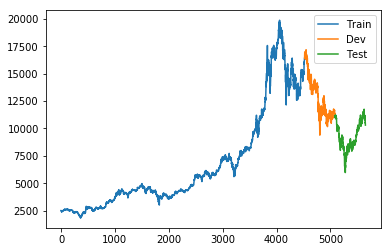

In [45]:
# Display train/dev/test sets
idx_dev_start = len(traindata); idx_dev_end = len(traindata) + len(devdata)
idx_test_start = idx_dev_end; idx_test_end = idx_dev_end + len(testdata)

plt.figure(); 
plt.plot(range(len(traindata)), traindata, label='Train'); plt.legend()
plt.plot(range(idx_dev_start, idx_dev_end), devdata, label='Dev')
plt.plot(range(idx_test_start, idx_test_end), testdata, label='Test')
plt.legend()

In [49]:
def event_count(time_series, data_name):
    upevents = 0
    downevents = 0
    sameprice = 0
    prev_obv = time_series[0]
    for obv in time_series[1:]:
        if obv > prev_obv:
            upevents += 1
        elif obv < prev_obv:
            downevents += 1
        elif obv == prev_obv:
            sameprice += 1
        prev_obv = obv
    print('=== Event counts on %s ===' % data_name)
    print('upevents')
    print(upevents)
    print('downevents')
    print(downevents)
    print('sameprice')
    print(sameprice)
    print()

In [50]:
def mse(time_series, data_name):
    total_squared_error = 0
    total_absolute_error = 0
    prev_obv = time_series[0]
    for obv in time_series[1:]:
      total_squared_error += (obv - prev_obv)**2
      total_absolute_error += abs(obv - prev_obv)
      prev_obv = obv
    num_predictions = len(time_series) - 1
    mean_squared_error = total_squared_error / num_predictions
    mean_absolute_error = total_absolute_error / num_predictions
    root_mean_squared_error = np.sqrt(mean_squared_error)
    print('=== baseline on %s ===' % data_name)
    print('total squared error')
    print(total_squared_error)
    print('total absolute error')
    print(total_absolute_error)
    print('mean squared error')
    print(mean_squared_error)
    print('mean absolute error')
    print(mean_absolute_error) 
    print('root mean squared error')
    print(root_mean_squared_error) 
    print()

In [51]:
event_count(hourly_prices, 'ALL')
event_count(traindata, 'TRAIN')
event_count(devdata, 'DEV')
event_count(testdata, 'TEST')

=== Event counts on ALL ===
upevents
2902
downevents
2648
sameprice
99

=== Event counts on TRAIN ===
upevents
2342
downevents
2081
sameprice
96

=== Event counts on DEV ===
upevents
280
downevents
281
sameprice
3

=== Event counts on TEST ===
upevents
278
downevents
286
sameprice
0



In [52]:
mse(hourly_prices, 'ALL')
mse(traindata, 'TRAIN')
mse(devdata, 'DEV')
mse(testdata, 'TEST')

=== baseline on ALL ===
total squared error
111419382.70399998
total absolute error
433252.560000001
mean squared error
19723.735653035932
mean absolute error
76.69544344131722
root mean squared error
140.44121778536362

=== baseline on TRAIN ===
total squared error
75421413.48809992
total absolute error
285459.2900000003
mean squared error
16689.845870347403
mean absolute error
63.168685549900495
root mean squared error
129.18918635221527

=== baseline on DEV ===
total squared error
24221337.641200013
total absolute error
85687.21999999997
mean squared error
42945.63411560286
mean absolute error
151.92769503546094
root mean squared error
207.23328428513327

=== baseline on TEST ===
total squared error
11776098.54899999
total absolute error
62075.22
mean squared error
20879.60735638296
mean absolute error
110.06244680851064
root mean squared error
144.4977763025541

